# Homework 4

## Kevin Han

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [152]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [153]:
df = pd.read_csv('nyc-taxi-data.csv')
df

,07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,2013-01-01 00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,40.715008,CSH,3.50,0.50,0.50.1,0.00,0.00.1,4.50
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [154]:
# Add column headers
attributes = ["medallion", "hack license", "pickup datetime", "dropoff datetime", "trip time in secs", "trip distance", "pickup longitude", "pickup latitude", "dropoff longitude", "dropoff latitude", "payment type", "fare amount", "surcharge", "mta tax", "tip amount", "tolls amount", "total amount"]
df.columns = attributes
df

,medallion,hack license,pickup datetime,dropoff datetime,trip time in secs,trip distance,pickup longitude,pickup latitude,dropoff longitude,dropoff latitude,payment type,fare amount,surcharge,mta tax,tip amount,tolls amount,total amount
0,22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,2013-01-01 00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,CSH,27.0,0.0,0.5,0.00,0.0,27.50
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


In [155]:
# Drop rows with listed conditions
df = df[~((df['trip distance'] < 1) & (df['total amount'] > 20))]

In [156]:
# Clean up incorrect data types. Drops rows with nonfloat values in columns that should only have numerical values.
# First force-convert data to floats
floatColumns = ['trip time in secs', 'trip distance', 'pickup longitude', 'pickup latitude', 'dropoff longitude', 'dropoff latitude', 'fare amount', 'surcharge', 'mta tax', 'tip amount', 'tolls amount', 'total amount']
df[floatColumns] = df[floatColumns].apply(pd.to_numeric, errors = 'coerce')

# All non-numerical values should've been converted to NaN's. We can drop them now.
df = df.dropna(subset=floatColumns)

/var/folders/j0/5btyzqtd1p918nx0wqtnrpcr0000gn/T/ipykernel_2162/2946482726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[floatColumns] = df[floatColumns].apply(pd.to_numeric, errors = 'coerce')


In [157]:
# Ensure that all items in pickup datetime and dropoff datetime columns are actual datetime objects.
# First force-convert data into datetime objects
datetimeColumns = ['pickup datetime', 'dropoff datetime']
df[datetimeColumns] = df[datetimeColumns].apply(pd.to_datetime, errors = 'coerce')

# All non-datetime objects should've been converted to Null or Nones. We can drop them now.
df = df[df[datetimeColumns].notnull().all(axis = 1)]

In [158]:
df

,medallion,hack license,pickup datetime,dropoff datetime,trip time in secs,trip distance,pickup longitude,pickup latitude,dropoff longitude,dropoff latitude,payment type,fare amount,surcharge,mta tax,tip amount,tolls amount,total amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
4,5FAA7F69213D26A42FA435CA9511A4FF,00B7691D86D96AEBD21DD9E138F90840,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.00,0.000000,0.000000,0.000000,0.000000,CRD,2.5,0.5,0.5,0.25,0.0,3.75
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.70,0.0,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

                   trip distance  trip time in secs  fare amount
trip distance           1.000000           0.774989     0.937853
trip time in secs       0.774989           1.000000     0.845473
fare amount             0.937853           0.845473     1.000000


array([[<Axes: xlabel='trip distance', ylabel='trip distance'>,
        <Axes: xlabel='trip time in secs', ylabel='trip distance'>,
        <Axes: xlabel='fare amount', ylabel='trip distance'>],
       [<Axes: xlabel='trip distance', ylabel='trip time in secs'>,
        <Axes: xlabel='trip time in secs', ylabel='trip time in secs'>,
        <Axes: xlabel='fare amount', ylabel='trip time in secs'>],
       [<Axes: xlabel='trip distance', ylabel='fare amount'>,
        <Axes: xlabel='trip time in secs', ylabel='fare amount'>,
        <Axes: xlabel='fare amount', ylabel='fare amount'>]], dtype=object)

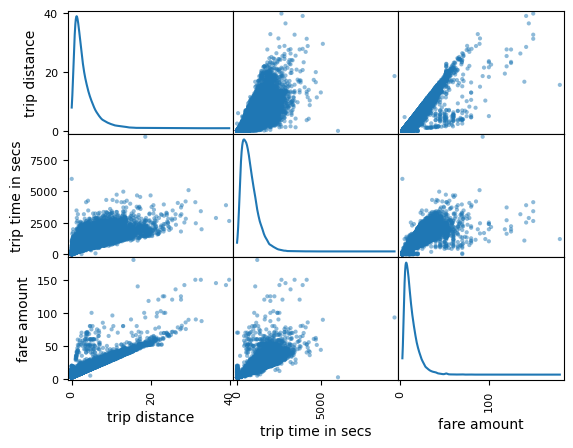

In [159]:
analyzedColumns = ['trip distance', 'trip time in secs', 'fare amount']
print(df[analyzedColumns].corr())
pd.plotting.scatter_matrix(df[analyzedColumns], diagonal = 'kde')

There appears to be positive correlations between any two parameters of data, which intuitively makes sense as a larger trip distance should take a larger amount of time which should result in a larger fare. Of course this is not always the case as one would also have to consider traffic conditions, location, etc., but these are accounted for in the noise of the data. We could still see from the relatively high correlation coefficients that our trend prediction was accurate.

## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [160]:
# Import sklearn and get regression coefficient
from sklearn.linear_model import LinearRegression
analyzedColumns = ['trip distance', 'fare amount']
tripDistance = np.vstack((df['trip distance'], )).T
reg = LinearRegression().fit(tripDistance, df['fare amount'])
print(reg.coef_)
print(reg.intercept_)
print(len(df['trip distance']))

[2.86130575]
3.7480690617316963
49688


Since we want to use the model to predict a fare amount for a 3 mile trip, it would make the most sense to use trip distance as our independent variable and fare amount as our dependent. Thus, for our linear regression equation, we can define $S \in \mathbb{R}^{n\times 1}$ as our fare amount and the operator $D \in \mathbb{R}^{n\times 2}$ as our trip distance for $n$ datapoints. Then, we define the regresion coefficient vector $\beta \in V^* \subseteq\mathbb{R}^{2 \times 1}$, where $V^*$ is the dual space to the vector space containing $D$, such that

$S = D\beta$.

$\beta$ will be determined by the regression algorithm. Note that the first column in D will all be 1 for the intercept term, and $\beta$ will contain $\beta_0$ and $\beta_1$ from the standard form of this equation $s = \beta_0 + \beta_1 d$, where $\beta_1 = r\frac{s_s}{s_d}$ and $s_d$ and $s_s$ denotes the standard deviations of the elements in $D_{n2}$ and $S$ respectively (for non multilinear regression). So for our regression, $\beta_0 = 3.7480690617316963$ and $\beta_1 = 2.86130575$. For this dataset, $n = 49688$.

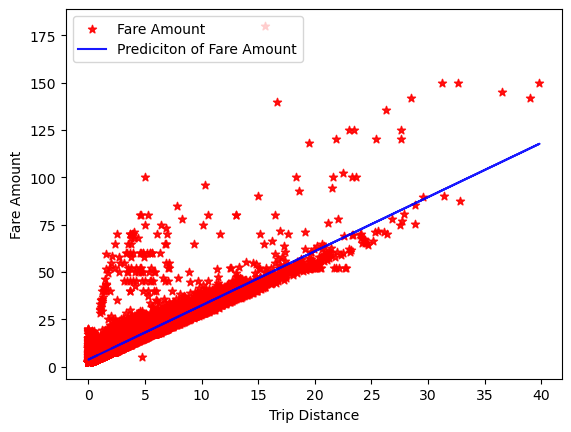

[12.3319863]


In [161]:
# get plot
fig = plt.figure()
plt.scatter(df['trip distance'], df['fare amount'], c="red", alpha=0.9, marker='*',label="Fare Amount")
plt.plot(df['trip distance'], reg.predict(tripDistance), c="blue", alpha=0.9,label="Prediciton of Fare Amount")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.legend(loc='upper left')
plt.show()
print(reg.predict([[3,]]))

As we can see, the predicted fare amount for a trip distance of 3 miles is $12.33.

## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, travel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [162]:
analyzedColumns = ['trip distance','trip time in secs']
reg2 = LinearRegression().fit( df[analyzedColumns], df['total amount'])
print(reg2.coef_)
print(reg2.intercept_)

[2.45081294 0.00536665]
3.1502501051673146


Our equation is pretty similar to last time, except I will now define an operator $X \in \mathbb{R}^{n \times 3}$ such that:

$S = X\beta$,

where column $X_{n2}$ represents trip distance inputs and $X_{n3}$ represents trip time.

We are working in higher dimensions, so $S \in \mathbb{R}^{n\times 1}$ and $\beta \in \mathbb{R}^{3 \times 1}$. Now, according to our regression, $\beta_0 = 3.1502501051673146$, $\beta_1 = 2.45081294$, and $\beta_2 = 0.00536665$. $n$ is still $49688$. 



In [166]:
# Include a plot if you want, but I'm just gonna calculate it
totalAmountAnswer = reg2.intercept_ + reg2.coef_[0] * 3 + reg2.coef_[1] * 6 * 60
print(totalAmountAnswer)

12.434683096638457


Thus, the predicted total amount for a trip time of 6 minutes and distance of 3 miles is $12.44.

## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs
* Provide the Regression Coefficients of your model after stop or convergance. 

Please note that a visualization **is** required, unlike in Task 3 and 4.

In [164]:
# set up hyperparams
learningRate = 0.09
num_iteration = 400
beta = np.array([0, 0])
n = float(len(df['trip distance']))
distances = np.array(df['trip distance'])
# construct d matrix
d = np.column_stack((np.ones_like(distances), distances))
s = np.array(df['fare amount'])
prec = 0.01
costs = []
iters = []



for i in range(num_iteration):
    iters.append(i)
    # Calculate the prediction with current regression coefficients. 
    cost = 0
    gradient = 0
    
    s_prediction = np.dot(d , beta)
    
    cost = sum(( s - s_prediction)**2)
    costs.append(cost)

    # calculate gradients. sum the gradients for all rows. not generalized code but works for this assignment
    gradient = np.array([(np.dot(d[:, 0], (s - s_prediction))),  (np.dot(d[:, 1], (s - s_prediction)))])

    gradient = (-1.0/n)* gradient
    
    print(i , "beta = ", beta, " Cost=", cost)
        
    # update the weights - Regression Coefficients 
    beta = beta - learningRate * gradient

    # check error
    if abs(beta[1] - reg.coef_[0]) < prec and abs(beta[0] - reg.intercept_) < prec:
        print('We have reached convergence!')
        break


0 beta =  [0 0]  Cost= 11624655.9405
1 beta =  [1.13970178 5.58710877]  Cost= 5079938.850316243
2 beta =  [0.61007733 1.9973043 ]  Cost= 2422513.9199622395
3 beta =  [1.13478235 4.24698145]  Cost= 1338999.5551474968
4 beta =  [0.981403   2.78307744]  Cost= 893085.100921829
5 beta =  [1.25233995 3.68293021]  Cost= 705784.6656437768
6 beta =  [1.24655328 3.08025799]  Cost= 623673.500231947
7 beta =  [1.41029049 3.43463244]  Cost= 584618.1091202842
8 beta =  [1.45991664 3.18129689]  Cost= 563434.9969617374
9 beta =  [1.57611753 3.31566111]  Cost= 549897.7280779622
10 beta =  [1.64418153 3.20443064]  Cost= 539835.8414688149
11 beta =  [1.73731134 3.25044855]  Cost= 531532.24888454
12 beta =  [1.80915499 3.19739795]  Cost= 524265.0223378046
13 beta =  [1.88940932 3.20830254]  Cost= 517717.06184110104
14 beta =  [1.95938286 3.17941479]  Cost= 511737.02024149796
15 beta =  [2.03115957 3.17670098]  Cost= 506242.3991670044
16 beta =  [2.09723739 3.15816158]  Cost= 501180.1949794113
17 beta =  [

Text(0, 0.5, 'Iteration (log scale)')

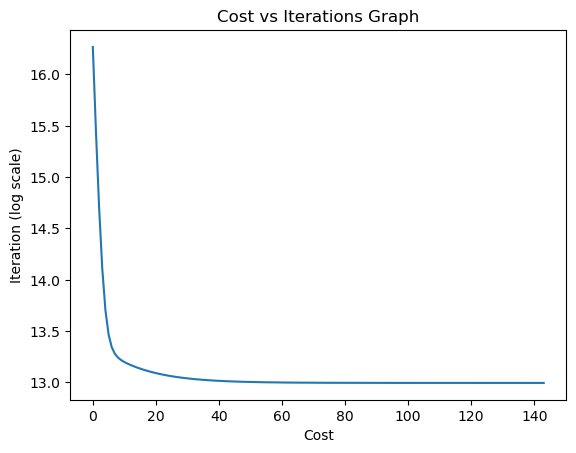

In [165]:
# plot
plt.plot(iters, np.log(costs))
plt.title('Cost vs Iterations Graph')
plt.xlabel('Cost')
plt.ylabel('Iteration (log scale)')

After just 143 iterations, our beta vector converged to within 0.01 of the true value! The final beta vector is [3.7377088  2.86318474].